1. 가설 설정
데이터 분석 전에 데이터 간의 연관성에 대한 임의의 가설 설정하기

2. 데이터 시각화
4종류 이상의 시각화 기법을 사용하여 그래프 그리기 Seaborn 라이브러리 활용

3. 데이터 분석
각 그래프로부터 얻을 수 있는 의미 도출

4. 최초의 가설 검정
가설이 유의미한지 여부 판단하기

In [87]:
import numpy as np
import seaborn as sns
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

In [88]:
filepath = "./dataset/bike_sharing_demand_train.csv"
data = pd.read_csv(filepath)

In [89]:
data.head()

,datetime,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count
0,2011-01-01 00:00:00,1,0,0,1,9.84,14.395,81,0.0,3,13,16
1,2011-01-01 01:00:00,1,0,0,1,9.02,13.635,80,0.0,8,32,40
2,2011-01-01 02:00:00,1,0,0,1,9.02,13.635,80,0.0,5,27,32
3,2011-01-01 03:00:00,1,0,0,1,9.84,14.395,75,0.0,3,10,13
4,2011-01-01 04:00:00,1,0,0,1,9.84,14.395,75,0.0,0,1,1


In [90]:
data['datetime'] = data['datetime'].astype('datetime64')

In [91]:
data['year'] = data['datetime'].dt.year
data['month'] = data['datetime'].dt.month
data['day'] = data['datetime'].dt.day
data['hour'] = data['datetime'].dt.hour
data['minute'] = data['datetime'].dt.minute
data['second'] = data['datetime'].dt.second

# 가설 1. 온도가 20~30도 사이에 많이 탈것이다.

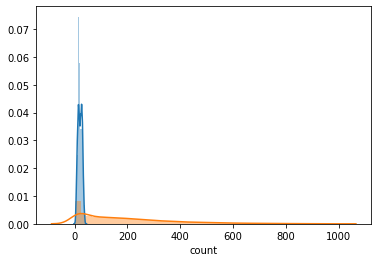

In [92]:
sns.distplot(data['temp'], label="temp")
sns.distplot(data['count'], label="count")

displot으로 판단하기 어려움

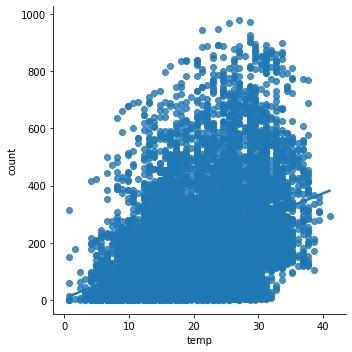

In [93]:
sns.lmplot(x="temp", y="count",data=data)

온도가 20~30도 사이에 count가 많이 분포함을 알 수 있다.

# 가설2 : holiday에는 count 수가 더 많을것이다.

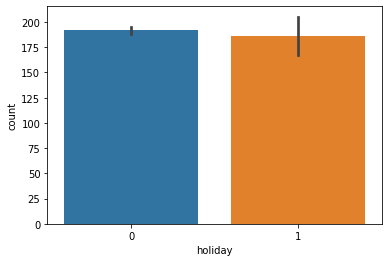

In [94]:
sns.barplot(x='holiday', y='count', data=data)

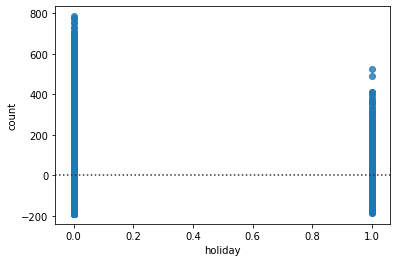

In [95]:
sns.residplot(x='holiday', y='count', data=data)

0: holiday가 아닌날. 그러므로 그렇지 않음을 발견할수있다.

# 가설3: 날씨가 좋은날 더 많이 탈 것이다.

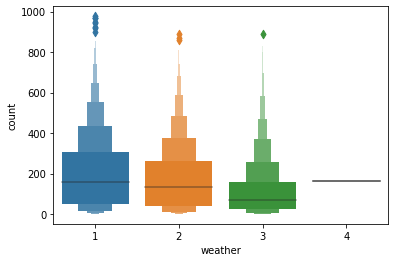

In [96]:
sns.boxenplot(x='weather', y='count', data=data)

날씨가 나빠질수록 count숫자가 줄어듬을 확일할 수 있다.